In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./Data_Set/placement.csv')

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.shape

(100, 4)

# Steps

### 0. Preprocess + EDA + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train test split
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the modelhe model

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


## Preprocess

In [12]:
df1 = df.iloc[:,1:]

In [14]:
df1.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## EDA

Text(0.5, 1.0, 'Placement Yes/No')

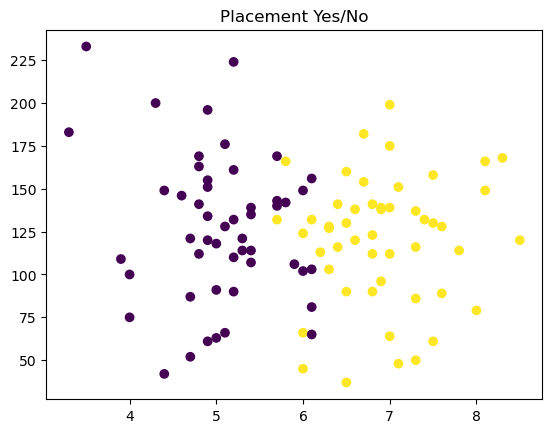

In [19]:
plt.scatter(df1.cgpa,df1.iq,c=df1.placement)
plt.title("Placement Yes/No")

## Extract input and output cols

In [20]:
x = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

In [21]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

## Train test split

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [27]:
X_test

,cgpa,iq
43,6.8,141.0
71,6.1,132.0
80,4.9,196.0
20,6.6,120.0
38,6.5,160.0
63,6.3,128.0
13,6.4,116.0
23,4.7,87.0
16,5.2,224.0
55,7.8,114.0


In [28]:
y_test

43    1
71    1
80    0
20    1
38    1
63    1
13    1
23    0
16    0
55    1
Name: placement, dtype: int64

In [29]:
X_train

,cgpa,iq
6,5.7,143.0
77,7.3,50.0
90,7.3,86.0
27,6.0,124.0
98,6.3,103.0
...,...,...
61,7.3,137.0
94,4.7,52.0
26,7.0,199.0
91,7.5,158.0


In [30]:
y_train

6     0
77    1
90    1
27    1
98    1
     ..
61    1
94    0
26    1
91    1
31    0
Name: placement, Length: 90, dtype: int64

## Scale the values

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_train

array([[-0.23750649,  0.54558928],
       [ 1.14156347, -1.82051552],
       [ 1.14156347, -0.90460399],
       [ 0.02106912,  0.06219152],
       [ 0.27964474, -0.47209021],
       [ 0.107261  , -1.03181392],
       [ 2.0034822 ,  1.18163896],
       [-0.15131462,  0.52014729],
       [-0.92704148,  0.74912518],
       [ 0.45202849,  0.21484345],
       [ 0.96917972,  0.74912518],
       [-0.49608211, -0.37032226],
       [-0.49608211, -0.19222835],
       [-0.66846586, -0.80283604],
       [-2.13372769,  2.83536812],
       [-0.92704148,  0.3166114 ],
       [-1.70276833, -1.18446584],
       [-0.92704148, -0.03957642],
       [-1.35800084, -2.02405142],
       [ 1.83109845,  1.13075498],
       [ 0.27964474,  0.13851749],
       [ 0.62441223,  1.53782678],
       [-0.58227398, -0.19222835],
       [ 0.107261  , -1.43888571],
       [-0.75465773,  1.38517485],
       [-2.30611144,  1.56326876],
       [ 1.83109845,  0.6982412 ],
       [ 0.88298785, -1.4643277 ],
       [-1.01323335,

In [35]:
X_test = scaler.transform(X_test)

In [36]:
X_test

array([[ 0.71060411,  0.4947053 ],
       [ 0.107261  ,  0.26572742],
       [-0.92704148,  1.8940146 ],
       [ 0.53822036, -0.03957642],
       [ 0.45202849,  0.97810306],
       [ 0.27964474,  0.16395947],
       [ 0.36583662, -0.14134437],
       [-1.09942522, -0.879162  ],
       [-0.66846586,  2.60639023],
       [ 1.57252283, -0.19222835]])

## Train the model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()

In [40]:
clf.fit(X_train,y_train)

LogisticRegression()

## Evaluate the model/model selection

In [41]:
y_pred = clf.predict(X_test)

In [42]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

1.0

In [47]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.0 MB/s eta 0:00:00


In [48]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

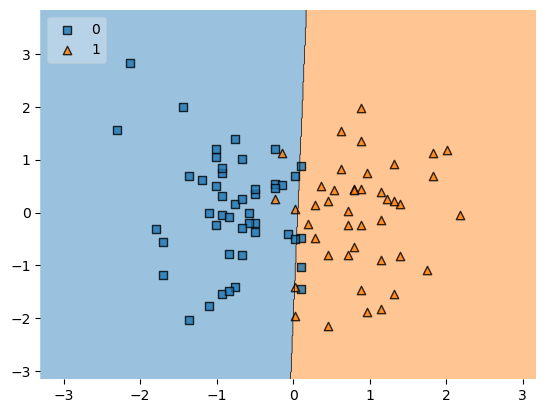

In [49]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [50]:
import pickle

In [51]:
pickle.dump(clf,open('model.pkl','wb'))